# T Student
<hr style="border-top-width: 4px; border-top-color: #34609b;">
Example macro describing the student t distribution

```cpp
root[0]: .x tStudent.C
```

It draws the pdf, the cdf and then 10 quantiles of the t Student distribution




**Author:** Magdalena Slawinska  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-mirror/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer (Beta)</a> from the macro found in the ROOT repository  on Thursday, January 19, 2017 at 04:37 PM.</small></i>

In [1]:
%%cpp -d
#include "TH1.h"
#include "TF1.h"
#include "TCanvas.h"
#include "TSystem.h"
#include "TLegend.h"
#include "TLegendEntry.h"
#include "Math/DistFunc.h"

In [2]:
/* gSystem->Load("libMathMore");*/

This is the way to force load of mathmore in cling

In [3]:
ROOT::Math::MathMoreLibrary::Load();

int n=100;
double a=-5.;
double b=5.;

Info in <ROOT::Math::MathMoreLibrary>: libMathMore has been loaded.


Double r  = 3;

In [4]:
TF1* pdf = new TF1("pdf", "ROOT::Math::tdistribution_pdf(x,3.0)", a,b);
TF1* cum = new TF1("cum", "ROOT::Math::tdistribution_cdf(x,3.0)", a,b);

TH1D* quant = new TH1D("quant", "", 9, 0, 0.9);

for(int i=1; i < 10; i++)
   quant->Fill((i-0.5)/10.0, ROOT::Math::tdistribution_quantile((1.0*i)/10, 3.0 ) );

double xx[10];
xx[0] = -1.5;
for(int i=1; i<9; i++)
   xx[i]= quant->GetBinContent(i);
xx[9] = 1.5;
TH1D* pdfq[10];

Int nbin = n/10.0;

In [5]:
for(int i=0; i < 9; i++) {
   int nbin = n * (xx[i+1]-xx[i])/3.0 + 1.0;
   TString name = "pdf";
   name += i;
   pdfq[i]= new TH1D(name, "", nbin,xx[i],xx[i+1] );
   for(int j=1; j<nbin; j++) {
      double x= j*(xx[i+1]-xx[i])/nbin + xx[i];
      pdfq[i]->SetBinContent(j, ROOT::Math::tdistribution_pdf(x,3));
   }
}

TCanvas *Canvas = new TCanvas("DistCanvas", "Student Distribution graphs", 10, 10, 800, 700);
pdf->SetTitle("Student t distribution function");
cum->SetTitle("Cumulative for Student t");
quant->SetTitle("10-quantiles  for Student t");
Canvas->Divide(2, 2);
Canvas->cd(1);
pdf->SetLineWidth(2);
pdf->DrawCopy();
Canvas->cd(2);
cum->SetLineWidth(2);
cum->SetLineColor(kRed);
cum->Draw();
Canvas->cd(3);
quant->Draw();
quant->SetLineWidth(2);
quant->SetLineColor(kBlue);
quant->SetStats(0);
Canvas->cd(4);
pdfq[0]->SetTitle("Student t & its quantiles");
pdf->SetTitle("");
pdf->Draw();

Warning in <TH1::TH1>: nbins is <=0 - set to nbins = 1


Pdfq[0]->setaxisrange(-1.5, 0, 1.5,1.0);

In [6]:
pdfq[0]->SetTitle("Student t & its quantiles");
for(int i=0; i < 9; i++) {
   pdfq[i]->SetStats(0);
   pdfq[i]->SetFillColor(i+1);
   pdfq[i]->Draw("same");
}
Canvas->Modified();
Canvas->cd();

Draw all canvases 

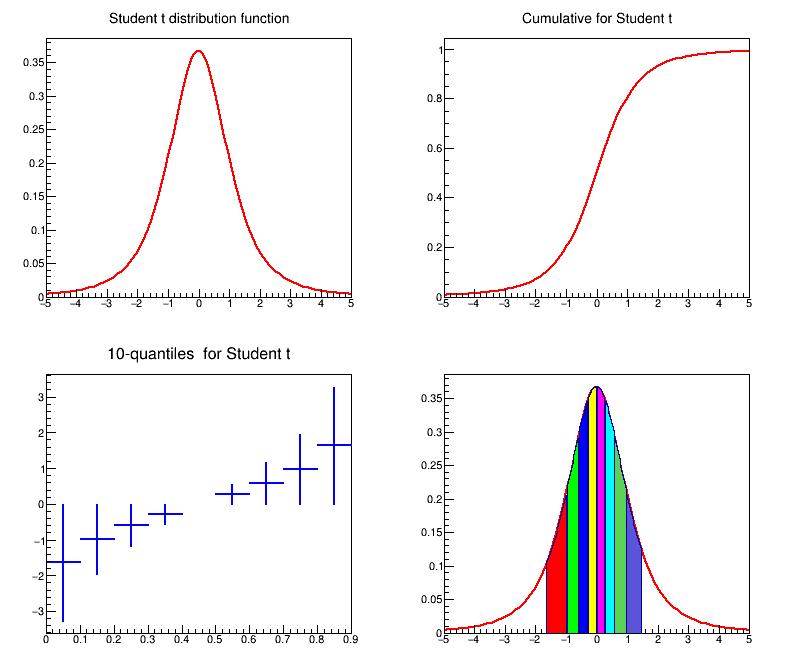

In [7]:
gROOT->GetListOfCanvases()->Draw()